In [ ]:
pip install matplotlib seaborn opencv-python numpy ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gXAVv17n0PwexK1g8kZE")
project = rf.workspace("study-ppql5").project("drowsiness-detection-2-ezliy-7lxam")
version = project.version(11)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drowsiness-Detection-2-11 in yolov8:: 100%|██████████| 6426/6426 [00:01<00:00, 5458.05it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ultralytics import YOLO

from IPython.display import display, Image

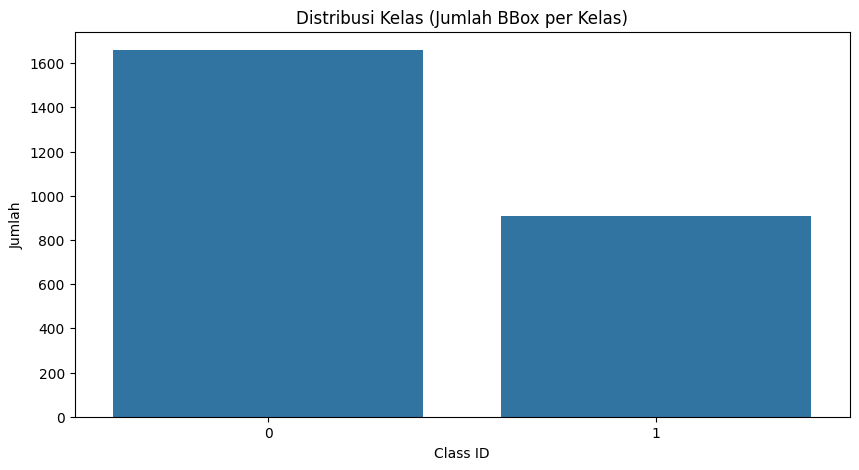

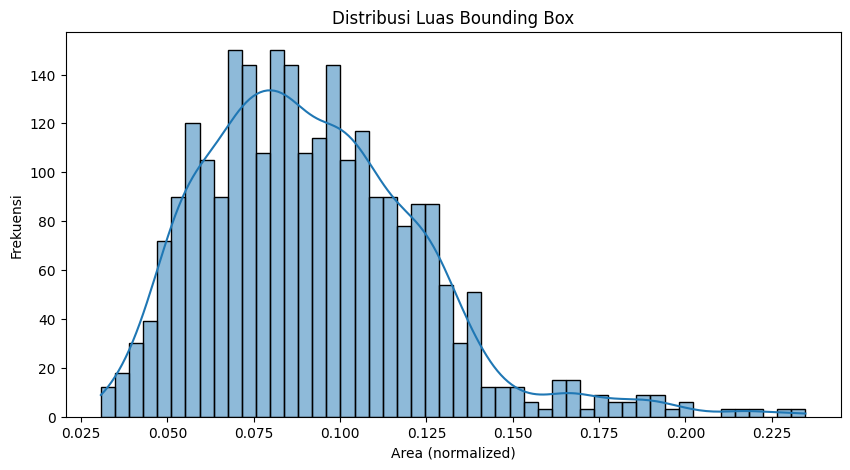

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path dataset dari Roboflow
DATASET_PATH = 'Drowsiness-Detection-2-10'
IMAGE_PATH = os.path.join(DATASET_PATH, 'train', 'images')
LABEL_PATH = os.path.join(DATASET_PATH, 'train', 'labels')

label_files = [f for f in os.listdir(LABEL_PATH) if f.endswith('.txt')]

class_counts = {}
bbox_areas = []

for label_file in label_files:
    with open(os.path.join(LABEL_PATH, label_file), 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.strip() == "":
                continue  # skip empty lines
            elements = line.strip().split()
            if len(elements) != 5:
                continue  # skip malformed lines

            class_id = int(elements[0])
            x_center, y_center, width, height = map(float, elements[1:])
            area = width * height
            bbox_areas.append(area)

            class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Kelas (Jumlah BBox per Kelas)")
plt.xlabel("Class ID")
plt.ylabel("Jumlah")
plt.show()

# Visualisasi distribusi ukuran bbox
plt.figure(figsize=(10, 5))
sns.histplot(bbox_areas, bins=50, kde=True)
plt.title("Distribusi Luas Bounding Box")
plt.xlabel("Area (normalized)")
plt.ylabel("Frekuensi")
plt.show()


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/Drowsiness-Detection-2-1/data.yaml' epochs=100 imgsz=360

100% 6.25M/6.25M [00:00<00:00, 120MB/s]
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Drowsiness-Detection-2-10/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=360, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/Drowsiness-Detection-2-11/data.yaml' epochs=120 imgsz=360

100% 6.25M/6.25M [00:00<00:00, 382MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Drowsiness-Detection-2-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=360, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/Drowsiness-Detection-2-10/data.yaml'

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2727.0±828.5 MB/s, size: 88.2 KB)
val: Scanning /content/Drowsiness-Detection-2-10/valid/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:02<00:00,  5.18it/s]
                   all        183        183      0.953      0.892      0.942       0.66
                drowsy         56         56          1      0.784      0.925      0.633
                  wake        127        127      0.905          1      0.958      0.687
Speed: 0.7ms preprocess, 2.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source='/WhatsApp Image 2025-05-03 at 20.05.33_8f82b9d2.jpg'

Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 981, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 552, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 238, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/torch

In [ ]:
# Misalnya kamu menyimpan best.pt
model_path = '/content/runs/detect/train/weights/best.pt'

In [ ]:
import torch
from ultralytics import YOLO
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# --- Load model ---
model = YOLO(model_path)

# --- Pruning (contoh sederhana dengan PyTorch) ---
def simple_prune_model(model, amount=0.2):
    """
    Prune model dengan menghilangkan 20% bobot terkecil pada semua Conv2d layers.
    """
    import torch.nn.utils.prune as prune

    logger.info("Mulai pruning model...")
    for name, module in model.model.named_modules():
        if isinstance(module, torch.nn.Conv2d):
            prune.l1_unstructured(module, name='weight', amount=amount)
            prune.remove(module, 'weight')  # Permanenkan pruning
    logger.info("Pruning selesai.")
    return model

# --- Quantization (static quantization example) ---
def quantize_model(model):
    """
    Quantize model menggunakan PyTorch static quantization.
    Hanya untuk CPU inference.
    """
    logger.info("Mulai quantization model...")

    model.model.eval()  # Harus eval dulu
    model.model = torch.quantization.quantize_dynamic(
        model.model,
        {torch.nn.Linear, torch.nn.Conv2d},
        dtype=torch.qint8
    )
    logger.info("Quantization selesai.")
    return model

# --- Terapkan pruning ---
pruned_model = simple_prune_model(model, amount=0.2)
pruned_model.save('/content/runs/detect/train/weights/best_pruned.pt')  # Format Ultralytics

# --- Terapkan quantization setelah pruning ---
quantized_model = quantize_model(pruned_model)
quantized_model.save('/content/runs/detect/train/weights/best_pruned_quantized.pt')  # Format Ultralytics


In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best_pruned.pt' data='/content/Drowsiness-Detection-2-10/data.yaml'

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2234.1±861.6 MB/s, size: 85.2 KB)
val: Scanning /content/Drowsiness-Detection-2-10/valid/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:02<00:00,  4.73it/s]
                   all        183        183      0.281      0.625      0.392      0.139
                drowsy         56         56       0.28      0.375      0.313      0.068
                  wake        127        127      0.282      0.874       0.47      0.211
Speed: 0.5ms preprocess, 2.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best_pruned_quantized.pt' data='/content/Drowsiness-Detection-2-10/data.yaml'

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2543.7±487.7 MB/s, size: 84.2 KB)
val: Scanning /content/Drowsiness-Detection-2-10/valid/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:02<00:00,  4.76it/s]
                   all        183        183      0.281      0.625      0.392      0.139
                drowsy         56         56       0.28      0.375      0.313      0.068
                  wake        127        127      0.282      0.874       0.47      0.211
Speed: 0.4ms preprocess, 2.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import requests

auth_token = "JMSJoJYzqTPfOYA6P3ywfot82MfIySRt"
value = "drowsy"  # hasil klasifikasi
pin = "V4"

url = f"https://blynk.cloud/external/api/update?token={auth_token}&{pin}={value}"
response = requests.get(url)

if response.status_code == 200:
    print("Berhasil kirim data ke Blynk:", value)
else:
    print("Gagal kirim:", response.text)


Gagal kirim: {"error":{"message":"Invalid token."}}


In [ ]:
def eksekusi_dengan_toleransi(func, percobaan_maksimal=3, jeda_percobaan=5, *args, **kwargs):
    """Mengeksekusi fungsi dengan mekanisme percobaan ulang"""
    percobaan = 0
    while percobaan < percobaan_maksimal:
        try:
            logger.info(f"Mencoba menjalankan {func.__name__}, percobaan ke-{percobaan+1}")
            hasil = func(*args, **kwargs)
            logger.info(f"Fungsi {func.__name__} berhasil dijalankan")
            return hasil
        except Exception as e:
            percobaan += 1
            logger.error(f"Error saat menjalankan {func.__name__}: {str(e)}")
            logger.error(traceback.format_exc())

            if percobaan >= percobaan_maksimal:
                logger.critical(f"Fungsi {func.__name__} gagal setelah {percobaan_maksimal} kali percobaan")
                raise

            logger.info(f"Mencoba ulang dalam {jeda_percobaan} detik...")
            time.sleep(jeda_percobaan)

In [ ]:
# Fungsi untuk menganalisis hasil dan menentukan status kantuk
def analisis_hasil_deteksi(hasil_path, ambang_batas_kantuk=0.6):
    try:
        # ... kode analisis ...
        return {
            "status": status,
            "skor_kantuk": skor_kantuk,
            "kepercayaan": tingkat_kepercayaan
        }
    except Exception as e:
        logger.error(f"Kesalahan saat menganalisis hasil: {str(e)}")
        # Nilai default yang aman - mengasumsikan kantuk sebagai tindakan pencegahan
        return {"status": "drowsy", "skor_kantuk": 1.0, "kepercayaan": 0.5}

In [ ]:
import time
import logging
import traceback

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
def eksekusi_dengan_toleransi(func, percobaan_maksimal=3, jeda_percobaan=5, *args, **kwargs):
    """Mengeksekusi fungsi dengan mekanisme percobaan ulang saat terjadi error."""
    percobaan = 0
    while percobaan < percobaan_maksimal:
        try:
            logger.info(f"Mencoba menjalankan {func.__name__}, percobaan ke-{percobaan + 1}")
            hasil = func(*args, **kwargs)
            logger.info(f"Fungsi {func.__name__} berhasil dijalankan")
            return hasil
        except Exception as e:
            percobaan += 1
            logger.error(f"Error saat menjalankan {func.__name__}: {str(e)}")
            logger.error(traceback.format_exc())

            if percobaan >= percobaan_maksimal:
                logger.critical(f"Fungsi {func.__name__} gagal setelah {percobaan_maksimal} kali percobaan")
                raise

            logger.info(f"Mencoba ulang dalam {jeda_percobaan} detik...")
            time.sleep(jeda_percobaan)

In [ ]:
def train_model():
    !yolo task=detect mode=train model="/content/runs/detect/train/weights/best.pt" data='/content/Drowsiness-Detection-2-11/data.yaml' epochs=120 imgsz=360

In [ ]:
eksekusi_dengan_toleransi(train_model, percobaan_maksimal=3, jeda_percobaan=10)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Drowsiness-Detection-2-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=360, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

In [ ]:
import torch
from ultralytics import YOLO
import time
import logging
import traceback
import requests

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# --- Load model ---
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

# --- Pruning (contoh sederhana dengan PyTorch) ---
def simple_prune_model(model, amount=0.2):
    """
    Prune model dengan menghilangkan 20% bobot terkecil pada semua Conv2d layers.
    """
    import torch.nn.utils.prune as prune

    logger.info("Mulai pruning model...")
    for name, module in model.model.named_modules():
        if isinstance(module, torch.nn.Conv2d):
            prune.l1_unstructured(module, name='weight', amount=amount)
            prune.remove(module, 'weight')  # Apply pruning permanen
    logger.info("Pruning selesai.")
    return model

# --- Quantization (static quantization example) ---
def quantize_model(model):
    """
    Quantize model menggunakan PyTorch static quantization.
    Hanya untuk CPU inference.
    """
    logger.info("Mulai quantization model...")

    model.model.eval()  # Eval mode wajib sebelum quantization

    model_int8 = torch.quantization.quantize_dynamic(
        model.model,  # model PyTorch bawaan ultralytics
        {torch.nn.Linear, torch.nn.Conv2d},
        dtype=torch.qint8
    )
    logger.info("Quantization selesai.")
    return model_int8

# --- Terapkan pruning dan quantization ---
model = simple_prune_model(model, amount=0.2)
quantized_model = quantize_model(model)

# Kamu bisa simpan model hasil pruning dan quantization:
torch.save(model.model.state_dict(), '/content/runs/detect/train/weights/best_pruned.pt')
torch.save(quantized_model.state_dict(), '/content/runs/detect/train/weights/best_quantized.pt')

In [ ]:
import time
import logging
import traceback
import requests

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def eksekusi_dengan_toleransi(func, percobaan_maksimal=3, jeda_percobaan=5, *args, **kwargs):
    """Mengeksekusi fungsi dengan mekanisme percobaan ulang saat terjadi error."""
    percobaan = 0
    while percobaan < percobaan_maksimal:
        try:
            logger.info(f"Mencoba menjalankan {func.__name__}, percobaan ke-{percobaan + 1}")
            hasil = func(*args, **kwargs)
            logger.info(f"Fungsi {func.__name__} berhasil dijalankan ✅")
            return hasil
        except Exception as e:
            percobaan += 1
            logger.error(f"❌ Error saat menjalankan {func.__name__}: {str(e)}")
            logger.error(traceback.format_exc())

            if percobaan >= percobaan_maksimal:
                logger.critical(f"🚨 Fungsi {func.__name__} gagal setelah {percobaan_maksimal} kali percobaan")
                raise

            logger.info(f"🔄 Mencoba ulang dalam {jeda_percobaan} detik...")
            time.sleep(jeda_percobaan)

def kirim_data_ke_blynk(value):
    auth_token = "JMSJoJYzqTPfOYA6P3ywfot82MfIySRt"  # Token Blynk terbaru
    pin = "V4"
    url = f"https://blynk.cloud/external/api/update?token={auth_token}&{pin}={value}"
    response = requests.get(url)
    if response.status_code == 200:
        logger.info(f"📡 Berhasil kirim data ke Blynk: {value}")
        return True
    else:
        raise Exception(f"Gagal kirim: {response.text}")

def analisis_hasil_deteksi(hasil_path, ambang_batas_kantuk=0.6):
    try:
        # ... kode analisis ...
        # Contoh dummy output untuk ilustrasi
        status = "awake"
        skor_kantuk = 0.2
        tingkat_kepercayaan = 0.85

        logger.info(f"Analisis berhasil: Status={status} 😎, Skor kantuk={skor_kantuk}, Kepercayaan={tingkat_kepercayaan}")
        return {
            "status": status,
            "skor_kantuk": skor_kantuk,
            "kepercayaan": tingkat_kepercayaan
        }
    except Exception as e:
        logger.error(f"⚠️ Kesalahan saat menganalisis hasil: {str(e)}")
        logger.info("Mengembalikan nilai default: status='drowsy' 😴, skor_kantuk=1.0, kepercayaan=0.5")
        # Nilai default yang aman - mengasumsikan kantuk sebagai tindakan pencegahan
        return {"status": "drowsy", "skor_kantuk": 1.0, "kepercayaan": 0.5}
